
# MNIST simple - no CNN


The base code for this example was taken from
https://keras.io/examples/vision/mnist_convnet/

I changed the internal model layers to be just a simple set of dense layers.  I also added some visualization and data summaries to help with visualization.

John Wallin, MTSU


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# this is a really simple model - flatten the data, two dense layers, and a softmax layer for output

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="relu"),
        layers.Dense(num_classes, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# this the size for each batch of data during the training and the number of epochs
batch_size = 128
epochs = 15

# we are got to run this simple model over and over again.
histories = []
nruns = 1 # you can increase this, but colab has CPU limits on it

for i in range(nruns):

    # this is a simple model with 3 layers - 2 hidden layers and 1 output layer
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="relu"),
        layers.Dense(num_classes, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])


    # the metric we are using is categorical cross entropy - basically the loaa function difference between the predicted and actual values
    # in terms of their categorical distribution.   The adams optimizer is a variant of stochastic gradient descent.
    # the accuracy metric is the percentage of correct predictions
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    histories.append(history)

model.summary()

Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 0.8759 - accuracy: 0.7316 - val_loss: 0.3345 - val_accuracy: 0.9058
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8977 - val_loss: 0.2587 - val_accuracy: 0.9223
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3089 - accuracy: 0.9136 - val_loss: 0.2367 - val_accuracy: 0.9303
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2845 - accuracy: 0.9190 - val_loss: 0.2226 - val_accuracy: 0.9342
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.9244 - val_loss: 0.2147 - val_accuracy: 0.9365
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2589 - accuracy: 0.9274 - val_loss: 0.2107 - val_accuracy: 0.9407
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.9293 - val_loss: 0.2073 - val_accuracy: 0.9418
Epoch 

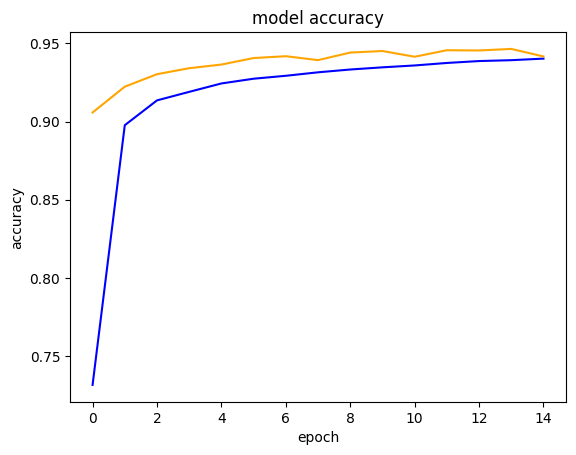

In [ ]:
# we can plot the output of the model and see how it performs on the test dataset.

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
for i in range(len(histories)):
    plt.plot(histories[i].history['accuracy'], label='train'+str(i), color='blue')
    plt.plot(histories[i].history['val_accuracy'], label='test'+str(i), color='orange')




313/313 [==============================] - 1s 2ms/step


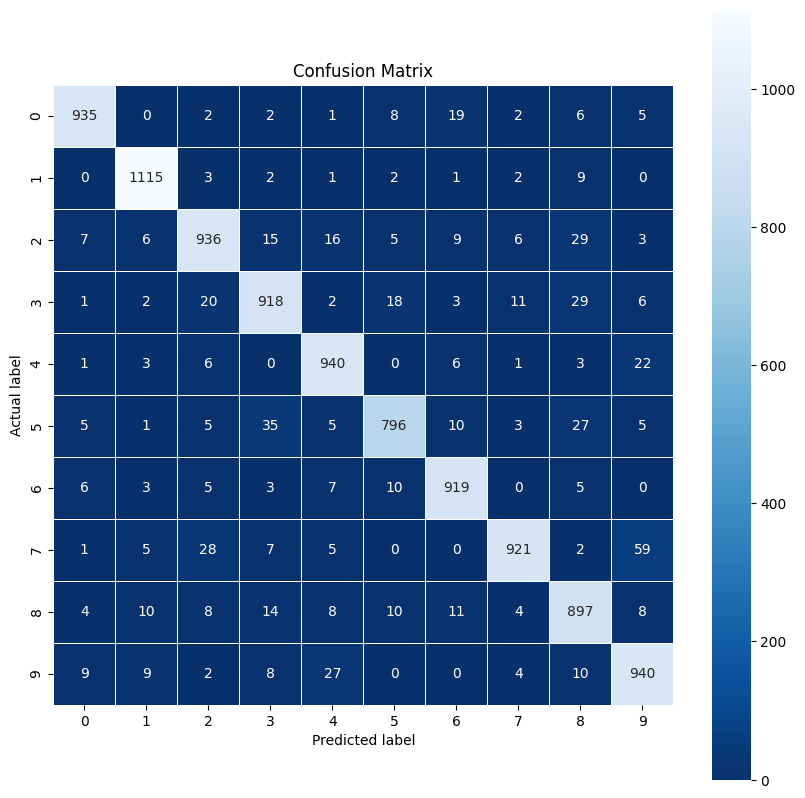

In [ ]:
# create a confusion matrix for the test set
# confusion matrix is a table that is often used to describe the performance of a classification model

def confusion_matrix(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    n = np.unique(y_true).shape[0]
    cm = np.zeros((n, n))
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

y_true = y_test
y_pred = model.predict(x_test)


die = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(die, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
